In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [43]:
boston = load_boston()

In [44]:
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

In [45]:
bostonDF['Price'] = boston.target
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [46]:
bostonDF_corr = bostonDF.corr()
bostonDF_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

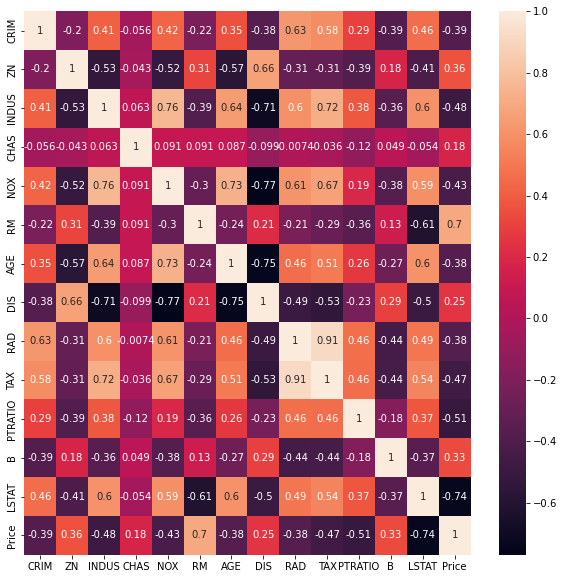

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(bostonDF_corr, annot=True)

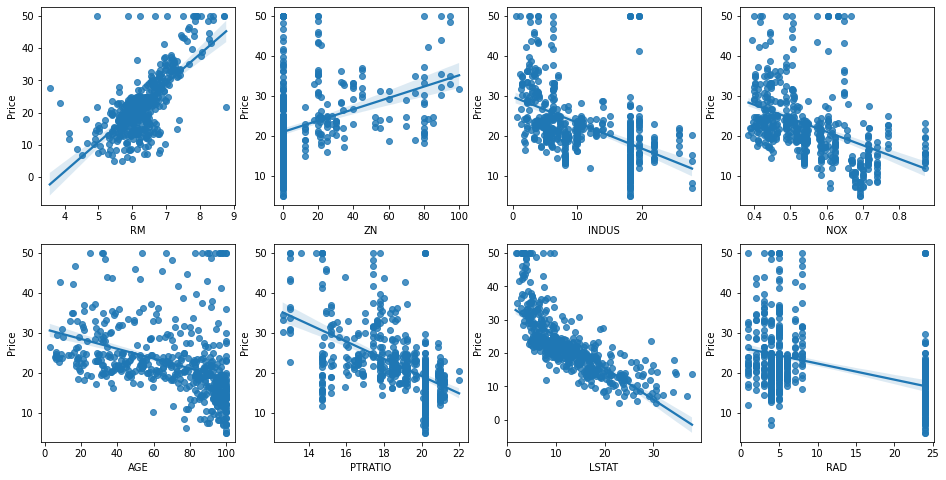

In [48]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='Price', data=bostonDF, ax=axs[row][col])

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(bostonDF.values, i) for i in range(bostonDF.shape[1])]
vif['features'] = bostonDF.columns
vif

,VIF Factor,features
0,2.131404,CRIM
1,2.910004,ZN
2,14.485874,INDUS
3,1.176266,CHAS
4,74.004269,NOX
5,136.101743,RM
6,21.398863,AGE
7,15.430455,DIS
8,15.369980,RAD
9,61.939713,TAX


In [51]:
X = bostonDF[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = bostonDF[['Price']]

In [52]:
from sklearn.preprocessing import MinMaxScaler

Xtrain, Xtest, ytrain, ytest= train_test_split(X, y, test_size=0.2, random_state=42)

MinMax = MinMaxScaler()
MinMax.fit(Xtrain)
Min_train_scaled = MinMax.transform(Xtrain)
Min_test_scaled = MinMax.transform(Xtest)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Min_train_scaled, ytrain)

LinearRegression()

In [53]:
lr.score(Min_test_scaled, ytest)

0.6687594935356318

In [54]:
bostonDF = bostonDF.drop(['RM'], axis=1)

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(bostonDF.values, i) for i in range(bostonDF.shape[1])]
vif['features'] = bostonDF.columns
vif

,VIF Factor,features
0,2.110287,CRIM
1,2.889159,ZN
2,14.202832,INDUS
3,1.174535,CHAS
4,62.073615,NOX
5,20.752654,AGE
6,14.258330,DIS
7,15.134503,RAD
8,61.603579,TAX
9,69.068505,PTRATIO


In [55]:
X = bostonDF[['CRIM','ZN','INDUS','CHAS','NOX','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = bostonDF[['Price']]

In [56]:
from sklearn.preprocessing import MinMaxScaler

Xtrain, Xtest, ytrain, ytest= train_test_split(X, y, test_size=0.2, random_state=42)

MinMax = MinMaxScaler()
MinMax.fit(Xtrain)
Min_train_scaled = MinMax.transform(Xtrain)
Min_test_scaled = MinMax.transform(Xtest)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Min_train_scaled, ytrain)

LinearRegression()

In [38]:
lr.score(Min_test_scaled, ytest)

0.6981848483147018

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
ypreds = lr.predict(Xtest)
mse = mean_squared_error(ytest, ypreds)
rmse = np.sqrt(mse)

In [60]:
print('MSE: {0:.3f}, RMSE: {1:3f}'.format(mse,rmse))
print('Variance score: {0:.3f}'.format(r2_score(ytest,ypreds)))

MSE: 7309211.532, RMSE: 2703.555350
Variance score: -99669.455


### 'PTRATIO'을 삭제했더니 점수가 낮아짐

In [20]:
bostonDF = bostonDF.drop(['PTRATIO'], axis=1)

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(bostonDF.values, i) for i in range(bostonDF.shape[1])]
vif['features'] = bostonDF.columns
vif

,VIF Factor,features
0,2.104099,CRIM
1,2.558330,ZN
2,14.147928,INDUS
3,1.162582,CHAS
4,59.247225,NOX
5,20.427509,AGE
6,9.639018,DIS
7,15.130157,RAD
8,58.759509,TAX
9,19.222365,B


In [21]:
X = bostonDF[['CRIM','ZN','INDUS','CHAS','NOX','AGE','DIS','RAD','TAX','B','LSTAT']]
y = bostonDF[['Price']]

In [22]:
from sklearn.preprocessing import MinMaxScaler

Xtrain, Xtest, ytrain, ytest= train_test_split(X, y, test_size=0.2, random_state=42)

MinMax = MinMaxScaler()
MinMax.fit(Xtrain)
Min_train_scaled = MinMax.transform(Xtrain)
Min_test_scaled = MinMax.transform(Xtest)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Min_train_scaled, ytrain)

LinearRegression()

In [23]:
lr.score(Min_test_scaled, ytest)

0.6601864166324876

### 'NOX'를 삭제했더니 점수가 낮아짐

In [39]:
bostonDF = bostonDF.drop(['NOX'], axis=1)

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(bostonDF.values, i) for i in range(bostonDF.shape[1])]
vif['features'] = bostonDF.columns
vif

,VIF Factor,features
0,2.110186,CRIM
1,2.888606,ZN
2,13.347466,INDUS
3,1.171416,CHAS
4,17.957190,AGE
5,14.257455,DIS
6,15.064897,RAD
7,59.057549,TAX
8,65.923618,PTRATIO
9,21.086573,B


In [40]:
X = bostonDF[['CRIM','ZN','INDUS','CHAS','PTRATIO','AGE','DIS','RAD','TAX','B','LSTAT']]
y = bostonDF[['Price']]

In [41]:
from sklearn.preprocessing import MinMaxScaler

Xtrain, Xtest, ytrain, ytest= train_test_split(X, y, test_size=0.2, random_state=42)

MinMax = MinMaxScaler()
MinMax.fit(Xtrain)
Min_train_scaled = MinMax.transform(Xtrain)
Min_test_scaled = MinMax.transform(Xtest)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Min_train_scaled, ytrain)

LinearRegression()

In [42]:
lr.score(Min_test_scaled, ytest)

0.6768761279446853